# Combine individual sample peak sets into one master peak set
We will use this master peak set to count all data into a merged object.

In [1]:
from pycisTopic.pseudobulk_peak_calling import export_pseudobulk, peak_calling
import pyranges as pr
import requests
import os
import pandas as pd
import glob
import pickle

In [2]:
from pycisTopic.iterative_peak_calling import get_consensus_peaks

In [3]:
# get chromosome sizes (hg38)
if not os.path.exists("chromsizes.txt"):
    target_url = (
        "http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes"
    )
    chromsizes = pd.read_csv(target_url, sep="\t", header=None)
    chromsizes.columns = ["Chromosome", "End"]
    chromsizes["Start"] = [0] * chromsizes.shape[0]
    chromsizes = chromsizes.loc[:, ["Chromosome", "Start", "End"]]
    chromsizes = pr.PyRanges(chromsizes)
    chromsizes.to_csv("chromsizes.txt")
    chromsizes
else:
    chromsizes = pd.read_csv("chromsizes.txt")

In [4]:
narrow_peaks_path_dict = {x.split('/')[-1].split(f'__')[0]: x for x in sorted(glob.glob("final_consensus_peaks/*_narrow_peaks_dict.pkl"))}
narrow_peaks_path_dict

{'BIO_ddseq_1.FULL': 'final_consensus_peaks/BIO_ddseq_1.FULL__SCREEN_narrow_peaks_dict.pkl',
 'BIO_ddseq_2.FULL': 'final_consensus_peaks/BIO_ddseq_2.FULL__SCREEN_narrow_peaks_dict.pkl',
 'BIO_ddseq_3.FULL': 'final_consensus_peaks/BIO_ddseq_3.FULL__SCREEN_narrow_peaks_dict.pkl',
 'BIO_ddseq_4.FULL': 'final_consensus_peaks/BIO_ddseq_4.FULL__SCREEN_narrow_peaks_dict.pkl',
 'BRO_mtscatac_1.FULL': 'final_consensus_peaks/BRO_mtscatac_1.FULL__SCREEN_narrow_peaks_dict.pkl',
 'BRO_mtscatac_2.FULL': 'final_consensus_peaks/BRO_mtscatac_2.FULL__SCREEN_narrow_peaks_dict.pkl',
 'CNA_10xmultiome_1.FULL': 'final_consensus_peaks/CNA_10xmultiome_1.FULL__SCREEN_narrow_peaks_dict.pkl',
 'CNA_10xmultiome_2.FULL': 'final_consensus_peaks/CNA_10xmultiome_2.FULL__SCREEN_narrow_peaks_dict.pkl',
 'CNA_10xv11_1.FULL': 'final_consensus_peaks/CNA_10xv11_1.FULL__SCREEN_narrow_peaks_dict.pkl',
 'CNA_10xv11_2.FULL': 'final_consensus_peaks/CNA_10xv11_2.FULL__SCREEN_narrow_peaks_dict.pkl',
 'CNA_10xv11_3.FULL': 'final_c

In [5]:
len(narrow_peaks_path_dict)

47

In [6]:
path_to_blacklist = '../0_resources/regions/hg38-blacklist.v2.bed'

In [7]:
peak_half_width = 250

# Get consensus peaks
peaks_master_dict = {}
for sample in narrow_peaks_path_dict.keys():
    print(sample)
    with open(narrow_peaks_path_dict[sample], 'rb') as f:
        narrow_peaks_dict = pickle.load(f)

    for cell_type in narrow_peaks_dict.keys():
        peaks_master_dict[f"{sample}__{cell_type}"] = narrow_peaks_dict[cell_type]

    consensus_peaks = get_consensus_peaks(
        peaks_master_dict,
        peak_half_width,
        chromsizes = chromsizes,
        path_to_blacklist = path_to_blacklist
    )

    consensus_peaks.to_bed(
        path="all.FIXEDCELLS.master_peaks.bed",
        keep=True,
        compression='infer',
        chain=False
    )

BIO_ddseq_1.FULL
2022-09-30 09:18:42,859 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 09:19:24,188 cisTopic     INFO     Normalizing peak scores
2022-09-30 09:19:24,362 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 09:20:01,463 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

BIO_ddseq_2.FULL
2022-09-30 09:20:02,345 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 09:21:20,075 cisTopic     INFO     Normalizing peak scores
2022-09-30 09:21:20,395 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 09:22:14,170 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

BIO_ddseq_3.FULL
2022-09-30 09:22:15,320 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 09:24:26,864 cisTopic     INFO     Normalizing peak scores
2022-09-30 09:24:27,481 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 09:25:33,281 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

BIO_ddseq_4.FULL
2022-09-30 09:25:34,753 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 09:28:05,055 cisTopic     INFO     Normalizing peak scores
2022-09-30 09:28:05,675 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 09:29:22,362 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

BRO_mtscatac_1.FULL
2022-09-30 09:29:24,132 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 09:32:44,792 cisTopic     INFO     Normalizing peak scores
2022-09-30 09:32:45,611 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 09:34:21,551 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

BRO_mtscatac_2.FULL
2022-09-30 09:34:23,721 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 09:38:35,455 cisTopic     INFO     Normalizing peak scores
2022-09-30 09:38:36,517 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 09:40:26,063 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

CNA_10xmultiome_1.FULL
2022-09-30 09:40:28,547 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 09:46:04,457 cisTopic     INFO     Normalizing peak scores
2022-09-30 09:46:07,899 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 09:48:10,941 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

CNA_10xmultiome_2.FULL
2022-09-30 09:48:13,708 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 09:53:50,428 cisTopic     INFO     Normalizing peak scores
2022-09-30 09:53:51,846 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 09:55:58,980 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

CNA_10xv11_1.FULL
2022-09-30 09:56:02,008 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 10:02:17,829 cisTopic     INFO     Normalizing peak scores
2022-09-30 10:02:19,429 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 10:04:31,381 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

CNA_10xv11_2.FULL
2022-09-30 10:04:34,596 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 10:11:27,744 cisTopic     INFO     Normalizing peak scores
2022-09-30 10:11:29,412 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 10:13:44,973 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

CNA_10xv11_3.FULL
2022-09-30 10:13:48,468 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 10:21:44,482 cisTopic     INFO     Normalizing peak scores
2022-09-30 10:21:46,487 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 10:24:10,728 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

CNA_10xv11_4.FULL
2022-09-30 10:24:14,505 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 10:32:49,262 cisTopic     INFO     Normalizing peak scores
2022-09-30 10:32:51,518 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 10:35:25,368 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

CNA_10xv11_5.FULL
2022-09-30 10:35:29,975 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 10:44:43,177 cisTopic     INFO     Normalizing peak scores
2022-09-30 10:44:45,578 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 10:47:24,087 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

CNA_10xv2_1.FULL
2022-09-30 10:47:28,483 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 10:57:58,377 cisTopic     INFO     Normalizing peak scores
2022-09-30 10:58:01,002 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 11:00:50,044 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

CNA_10xv2_2.FULL
2022-09-30 11:00:54,887 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 11:12:59,361 cisTopic     INFO     Normalizing peak scores
2022-09-30 11:13:02,383 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 11:16:04,168 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

CNA_hydrop_1.FULL
2022-09-30 11:16:09,289 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 11:28:20,492 cisTopic     INFO     Normalizing peak scores
2022-09-30 11:28:23,551 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 11:31:27,746 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

CNA_hydrop_2.FULL
2022-09-30 11:31:33,013 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 11:44:18,942 cisTopic     INFO     Normalizing peak scores
2022-09-30 11:44:22,135 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 11:48:35,778 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

CNA_hydrop_3.FULL
2022-09-30 11:48:42,170 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 12:18:26,100 cisTopic     INFO     Normalizing peak scores
2022-09-30 12:18:29,340 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 12:30:17,882 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

CNA_mtscatac_1.FULL
2022-09-30 12:30:25,888 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 12:54:19,170 cisTopic     INFO     Normalizing peak scores
2022-09-30 12:54:22,591 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 12:57:53,918 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

CNA_mtscatac_2.FULL
2022-09-30 12:57:59,980 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 13:11:39,518 cisTopic     INFO     Normalizing peak scores
2022-09-30 13:11:43,072 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 13:15:18,748 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

EPF_hydrop_1.FULL
2022-09-30 13:15:24,935 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 13:50:07,615 cisTopic     INFO     Normalizing peak scores
2022-09-30 13:50:18,396 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 14:20:06,031 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

EPF_hydrop_2.FULL
2022-09-30 14:21:25,387 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 16:23:41,144 cisTopic     INFO     Normalizing peak scores
2022-09-30 16:23:52,904 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 16:55:23,569 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

EPF_hydrop_3.FULL
2022-09-30 16:56:44,003 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 18:44:10,559 cisTopic     INFO     Normalizing peak scores
2022-09-30 18:44:14,348 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 18:47:57,101 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

EPF_hydrop_4.FULL
2022-09-30 18:48:03,645 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 19:03:14,622 cisTopic     INFO     Normalizing peak scores
2022-09-30 19:03:18,848 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 19:07:02,656 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

HAR_ddseq_1.FULL
2022-09-30 19:07:09,360 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 19:23:04,099 cisTopic     INFO     Normalizing peak scores
2022-09-30 19:23:08,125 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 19:26:56,386 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

HAR_ddseq_2.FULL
2022-09-30 19:27:04,097 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 19:43:31,174 cisTopic     INFO     Normalizing peak scores
2022-09-30 19:43:35,356 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 19:47:28,283 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

MDC_mtscatac_1.FULL
2022-09-30 19:47:35,436 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 20:05:22,525 cisTopic     INFO     Normalizing peak scores
2022-09-30 20:05:26,958 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 20:09:27,685 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

MDC_mtscatac_2.FULL
2022-09-30 20:09:35,110 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 20:28:08,453 cisTopic     INFO     Normalizing peak scores
2022-09-30 20:28:13,104 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 20:32:21,487 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

OHS_s3atac_1.FULL
2022-09-30 20:32:29,271 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 20:52:01,174 cisTopic     INFO     Normalizing peak scores
2022-09-30 20:52:05,995 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 20:56:28,804 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

OHS_s3atac_2.FULL
2022-09-30 20:56:37,029 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 21:17:44,784 cisTopic     INFO     Normalizing peak scores
2022-09-30 21:17:49,909 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 21:23:29,863 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

SAN_10xmultiome_1.FULL
2022-09-30 21:23:39,218 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 21:46:08,517 cisTopic     INFO     Normalizing peak scores
2022-09-30 21:46:13,916 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 21:52:05,227 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

SAN_10xmultiome_2.FULL
2022-09-30 21:52:15,014 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 22:16:16,079 cisTopic     INFO     Normalizing peak scores
2022-09-30 22:16:21,704 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 22:22:24,448 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

STA_10xv11_1.FULL
2022-09-30 22:22:34,619 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 22:47:38,326 cisTopic     INFO     Normalizing peak scores
2022-09-30 22:47:44,857 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 22:54:15,905 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

STA_10xv11_2.FULL
2022-09-30 22:54:29,085 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 23:20:35,157 cisTopic     INFO     Normalizing peak scores
2022-09-30 23:20:41,234 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-09-30 23:27:01,253 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

TXG_10xv11_1.FULL
2022-09-30 23:27:11,930 cisTopic     INFO     Extending and merging peaks per class
2022-09-30 23:54:11,084 cisTopic     INFO     Normalizing peak scores
2022-09-30 23:54:17,840 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-10-01 00:01:11,004 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

TXG_10xv2_1.FULL
2022-10-01 00:01:25,879 cisTopic     INFO     Extending and merging peaks per class
2022-10-01 00:29:56,396 cisTopic     INFO     Normalizing peak scores
2022-10-01 00:30:03,155 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-10-01 00:36:45,210 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

TXG_10xv2_2.FULL
2022-10-01 00:36:56,834 cisTopic     INFO     Extending and merging peaks per class
2022-10-01 01:06:48,827 cisTopic     INFO     Normalizing peak scores
2022-10-01 01:06:55,963 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-10-01 01:13:50,008 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

UCS_ddseq_1.FULL
2022-10-01 01:14:02,199 cisTopic     INFO     Extending and merging peaks per class
2022-10-01 01:44:33,662 cisTopic     INFO     Normalizing peak scores
2022-10-01 01:44:40,930 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-10-01 01:51:40,333 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

UCS_ddseq_2.FULL
2022-10-01 01:51:52,677 cisTopic     INFO     Extending and merging peaks per class
2022-10-01 02:23:05,741 cisTopic     INFO     Normalizing peak scores
2022-10-01 02:23:13,158 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-10-01 02:30:18,476 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

VIB_10xmultiome_1.FULL
2022-10-01 02:30:30,996 cisTopic     INFO     Extending and merging peaks per class
2022-10-01 03:02:07,245 cisTopic     INFO     Normalizing peak scores
2022-10-01 03:02:14,749 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-10-01 03:09:21,879 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

VIB_10xmultiome_2.FULL
2022-10-01 03:09:34,738 cisTopic     INFO     Extending and merging peaks per class
2022-10-01 03:41:45,749 cisTopic     INFO     Normalizing peak scores
2022-10-01 03:41:53,440 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-10-01 03:49:03,993 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

VIB_10xv1_1.FULL
2022-10-01 03:49:16,821 cisTopic     INFO     Extending and merging peaks per class
2022-10-01 04:22:06,950 cisTopic     INFO     Normalizing peak scores
2022-10-01 04:22:14,762 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-10-01 04:29:26,539 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

VIB_10xv1_2.FULL
2022-10-01 04:29:39,479 cisTopic     INFO     Extending and merging peaks per class
2022-10-01 05:03:38,697 cisTopic     INFO     Normalizing peak scores
2022-10-01 05:03:46,742 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-10-01 05:11:03,448 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

VIB_10xv2_1.FULL
2022-10-01 05:11:16,794 cisTopic     INFO     Extending and merging peaks per class
2022-10-01 05:46:35,030 cisTopic     INFO     Normalizing peak scores
2022-10-01 05:46:43,344 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-10-01 05:54:04,258 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

VIB_10xv2_2.FULL
2022-10-01 05:54:18,537 cisTopic     INFO     Extending and merging peaks per class
2022-10-01 06:31:13,807 cisTopic     INFO     Normalizing peak scores
2022-10-01 06:31:22,479 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-10-01 06:38:52,739 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

VIB_hydrop_1.FULL
2022-10-01 06:39:07,196 cisTopic     INFO     Extending and merging peaks per class
2022-10-01 07:16:30,714 cisTopic     INFO     Normalizing peak scores
2022-10-01 07:16:39,523 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-10-01 07:24:13,525 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

VIB_hydrop_2.FULL
2022-10-01 07:24:28,290 cisTopic     INFO     Extending and merging peaks per class
2022-10-01 08:02:23,319 cisTopic     INFO     Normalizing peak scores
2022-10-01 08:02:32,251 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2022-10-01 08:10:08,580 cisTopic     INFO     Done!


/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.8/site-packages/pyranges/out.py:37: FutureWarning: Passing a s

# Subset by occurrence

In [8]:
df = pd.read_csv("master_peaks/all.FIXEDCELLS.master_peaks.bed", header=None, sep="\t")

In [11]:
df["n_occ"] = [len(x.split(',')) for x in df[3]]

In [13]:
df[df["n_occ"] >= 9]

,0,1,2,3,4,5,n_occ
60462,chr1,827281,827781,"Dendriticcell_peak_5,Dendriticcell_peak_8a,Den...",90.736661,.,356
60463,chr1,869650,870150,"CD16_monocyte_peak_4,Bcell_peak_8,CD4_Tcell_pe...",45.723905,.,238
60464,chr1,906576,907076,"CytotoxicTcell_peak_8,CD4_Tcell_peak_11,Cytoto...",65.209101,.,194
60465,chr1,923654,924154,"CytotoxicTcell_peak_9,CytotoxicTcell_peak_10,C...",15.371761,.,190
60466,chr1,941579,942079,"CytotoxicTcell_peak_18,CytotoxicTcell_peak_19,...",28.701944,.,147
...,...,...,...,...,...,...,...
1554004,chrY,12906634,12907134,"CytotoxicTcell_peak_77425,CytotoxicTcell_peak_...",2.720951,.,37
1554005,chrY,7275227,7275727,"CD14_monocyte_peak_123035e,CytotoxicTcell_peak...",5.558055,.,108
1554006,chrY,12920674,12921174,"CD4_Tcell_peak_105844,CD16_monocyte_peak_81558...",3.498186,.,16
1554007,chrY,12909252,12909752,"CytotoxicTcell_peak_52255,CytotoxicTcell_peak_...",2.135737,.,9


In [14]:
df[df["n_occ"] >= 7]

,0,1,2,3,4,5,n_occ
60462,chr1,827281,827781,"Dendriticcell_peak_5,Dendriticcell_peak_8a,Den...",90.736661,.,356
60463,chr1,869650,870150,"CD16_monocyte_peak_4,Bcell_peak_8,CD4_Tcell_pe...",45.723905,.,238
60464,chr1,906576,907076,"CytotoxicTcell_peak_8,CD4_Tcell_peak_11,Cytoto...",65.209101,.,194
60465,chr1,923654,924154,"CytotoxicTcell_peak_9,CytotoxicTcell_peak_10,C...",15.371761,.,190
60466,chr1,941579,942079,"CytotoxicTcell_peak_18,CytotoxicTcell_peak_19,...",28.701944,.,147
...,...,...,...,...,...,...,...
1554004,chrY,12906634,12907134,"CytotoxicTcell_peak_77425,CytotoxicTcell_peak_...",2.720951,.,37
1554005,chrY,7275227,7275727,"CD14_monocyte_peak_123035e,CytotoxicTcell_peak...",5.558055,.,108
1554006,chrY,12920674,12921174,"CD4_Tcell_peak_105844,CD16_monocyte_peak_81558...",3.498186,.,16
1554007,chrY,12909252,12909752,"CytotoxicTcell_peak_52255,CytotoxicTcell_peak_...",2.135737,.,9


In [19]:
import matplotlib.pyplot as plt

In [22]:
import numpy as np

In [26]:
np.percentile(df["n_occ"], 75)

7.0

(0.0, 25.0)

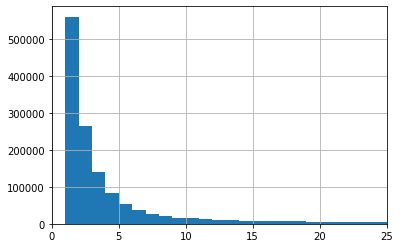

In [28]:
df["n_occ"].hist(bins=max(df["n_occ"]))
plt.xlim([0, 25])

In [ ]:
df[df["n_occ"] >= 7]

In [37]:
df[df["n_occ"] >= 7].drop("n_occ", axis=1).to_csv("master_peaks/all.FIXEDCELLS.master_peaks.occurrence_filtered7.bed2", sep='\t', header=False, index=None)

So we subset the master peak set to peaks that occur at least 7 times in the total set of all peaks